In [1]:
# Importing built-in libraries (packages)
import os
import sys
import six # Python 2 and 3 compatibility library; provides utility functions for smoothing over differences between versions 
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
print( "Necessary packages/libraries are imported at " + str( datetime.datetime.now() ) )

Necessary packages/libraries are imported at 2021-02-24 13:54:31.172475


In [2]:
# Doctorate Recipients by Demography--- Doctrate reciepients by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year
# Data Download from NCSES Interactive Data Tool
df = pd.read_csv('../../WorkingFiles/NSF_NCSES/Data/SED_export_table_2020-11-12T19_44_35.595Z.csv', skiprows=[0], header=[1])
df = df.set_index(['Citizenship','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Race and Ethnicity','Sex'])
df.head()

2018  \
Citizenship                        S&E Fields              Broad Fields              Detailed Fields                             Race and Ethnicity        Sex                                 
Total for selected values          Science and engineering Total for selected values Total for selected values                   Total for selected values Total for selected values  42,227   
                                                           Life sciences             Total for selected values                   Total for selected values Total for selected values  12,780   
                                                                                     Agricultural sciences and natural resources Total for selected values Total for selected values     793   
                                                                                                                                 Hispanic or Latino        Total for selected values      50   
U.S. citizen or permanent resident Science and engineering Life sciences             Agricultural sciences and natural resources Hispanic or Latino        Total for selected values      50   

                                                                                                                                                                                        2017  \
Citizenship                        S&E Fields              Broad Fields              Detailed Fields                             Race and Ethnicity        Sex                                 
Total for selected values          Science and engineering Total for selected values Total for selected values                   Total for selected values Total for selected values  41,294   
                                                           Life sciences             Total for selected values                   Total for selected values Total for selected values  12,555   
                                                                                     Agricultural sciences and natural resources Total for selected values Total for selected values     822   
                                                                                                                                 Hispanic or Latino        Total for selected values      47   
U.S. citizen or permanent resident Science and engineering Life sciences             Agricultural sciences and natural resources Hispanic or Latino        Total for selected values      47   

                                                                                                                                                                                        2016  \
Citizenship                        S&E Fields              Broad Fields              Detailed Fields                             Race and Ethnicity        Sex                                 
Total for selected values          Science and engineering Total for selected values Total for selected values                   Total for selected values Total for selected values  41,234   
                                                           Life sciences             Total for selected values                   Total for selected values Total for selected values  12,536   
                                                                                     Agricultural sciences and natural resources Total for selected values Total for selected values     771   
                                                                                                                                 Hispanic or Latino        Total for selected values      46   
U.S. citizen or permanent resident Science and engineering Life sciences             Agricultural sciences and natural resources Hispanic or Latino        Total for selected values      46   

                                                                                                                                                     

In [3]:
#  Doctorate Recipients -------- Data Download from NCSES Interactive Data Tool
df1 = pd.read_csv('../../WorkingFiles/NSF_NCSES/Data/SED_Export_2020-06-17T23_22_18.852Z.csv', skiprows=[0], header=[1])
df1 = df1.set_index(['S&E Fields', 'Broad Fields', 'Detailed Fields'])
df1.head()
# df1.dtypes
# df1.shape

2018  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        42227   
                        Life sciences Total                                        12780   
                                      Agricultural sciences and natural resources   1445   
                                      Biological and biomedical sciences            8801   
                                      Health sciences                               2534   

                                                                                    2017  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        41294   
                        Life sciences Total                                        12555   
                                      Agricultural sciences and natural resources   1494   
                                      Biological and biomedical sciences            8566   
                                      Health sciences                               2495   

                                                                                    2016  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        41234   
                        Life sciences Total                                        12536   
                                      Agricultural sciences and natural resources   1378   
                                      Biological and biomedical sciences            8861   
                                      Health sciences                               2297   

                                                                                    2015  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        41178   
                        Life sciences Total                                        12493   
                                      Agricultural sciences and natural resources   1434   
                                      Biological and biomedical sciences            8783   
                                      Health sciences                               2276   

                                                                                    2014  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        40633   
                        Life sciences Total                                        12484   
                                      Agricultural sciences and natural resources   1338   
                                      Biological and biomedical sciences            8868   
                                      Health sciences                               2278   

                                                                                    2013  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        39031   
                        Life sciences Total                                        12207   
                                      Agricultural sciences and natural resources   1324   
                                      Biological and biomedical sciences            8354   
                                      Health sciences                               2529   

                                                                                    2012  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total 

In [4]:
df1s = df1.stack()
df1s =df1s.to_frame()
df1s.head(10)
df1s = df1s.reset_index()
df1s.columns = ['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
# df1s.columns
df1s.head()
# df1s.shape

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Total,Total,2018,42227
1,Science and engineering,Total,Total,2017,41294
2,Science and engineering,Total,Total,2016,41234
3,Science and engineering,Total,Total,2015,41178
4,Science and engineering,Total,Total,2014,40633


In [5]:
df1s = df1s[df1s['Detailed Fields'] != 'Total']
df1s = df1s.reset_index()
df1s = df1s[['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
# df1s["Number"] = df1s["Number"].astype(str).astype(float)
# df1s.head(3)
# df1s.tail(3)
# df1s.shape

In [7]:
# Replace no data values '-' to Nan so that it can be dropped
df1s['Number'].replace('-', np.nan, inplace=True)
df1s = df1s.dropna()
#df1s.describe
#df1s.dtypes

# Converting from object to integer
df1s["Number"] = df1s["Number"].astype(str).astype(int)
df1s.dtypes
df1s.head(30)
#df1s.shape

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,1445
1,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,1494
2,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,1378
3,Science and engineering,Life sciences,Agricultural sciences and natural resources,2015,1434
4,Science and engineering,Life sciences,Agricultural sciences and natural resources,2014,1338
5,Science and engineering,Life sciences,Agricultural sciences and natural resources,2013,1324
6,Science and engineering,Life sciences,Agricultural sciences and natural resources,2012,1255
7,Science and engineering,Life sciences,Agricultural sciences and natural resources,2011,1206
8,Science and engineering,Life sciences,Agricultural sciences and natural resources,2010,1100
9,Science and engineering,Life sciences,Agricultural sciences and natural resources,2009,1283


In [9]:
p1 =  df1s.groupby(['S&E Fields', 'Year'])['Number'].sum()
p1 = p1.reset_index()
p1.head(20)
p1=p1.pivot(index='Year', columns='S&E Fields', values='Number')
p1.head(40)
p1.shape
# # Adding the stacked=True option to plot() 
# # creates a stacked bar plot
# p1.plot(kind='barh',colormap='tab20',figsize=(8, 10), width=1.0, stacked=True).legend(
#     loc='lower right', ncol=1, title="S&E Fields ")
# plt.title("Number of Doctrate Reciepients by Year (S&E and Non S&E)")
# plt.xlabel("Number")
# plt.ylabel("Year")

(61, 2)

Text(0, 0.5, 'Year')

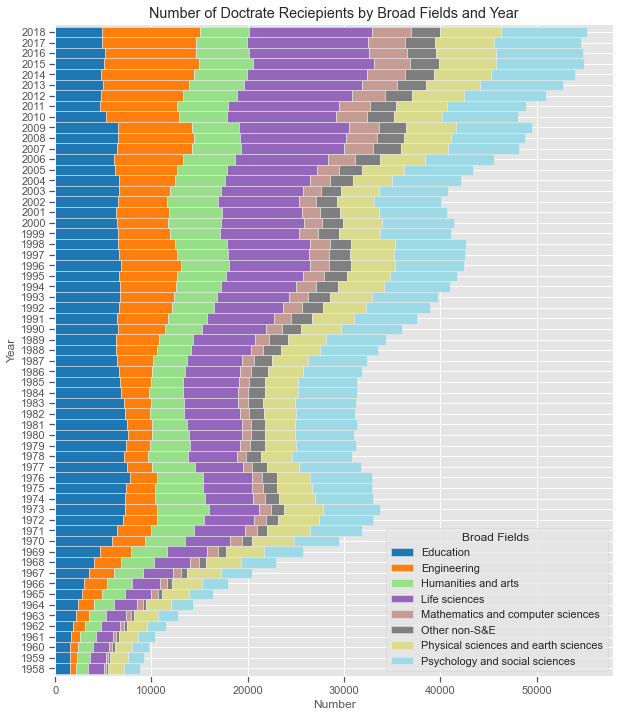

In [8]:
p2 =  df1s.groupby(['Broad Fields', 'Year'])['Number'].sum()
p2 = p2.reset_index()
p2=p2.pivot(index='Year', columns='Broad Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p2.plot(kind='barh',colormap='tab20',figsize=(10, 12), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Broad Fields ")
plt.title("Number of Doctrate Reciepients by Broad Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")

Text(0, 0.5, 'Year')

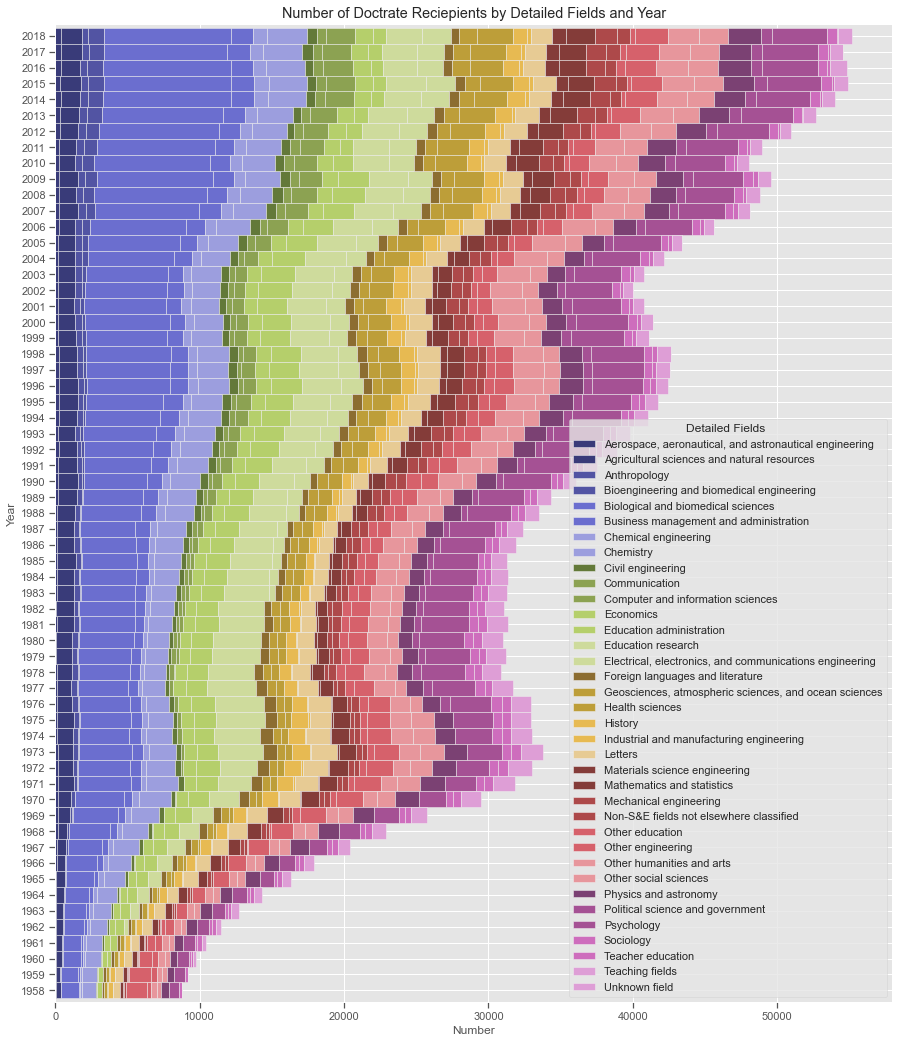

In [9]:
p3 =  df1s.groupby(['Detailed Fields', 'Year'])['Number'].sum()
p3 = p3.reset_index()
p3=p3.pivot(index='Year', columns='Detailed Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p3.plot(kind='barh',colormap='tab20b',figsize=(15, 18), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Detailed Fields ")
plt.title("Number of Doctrate Reciepients by Detailed Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")
#plt.legend(title="Line", loc='upper left', handles=handles[::-1])

In [10]:
df1s['S&E Fields'].unique()
df.count()

# df1s['Broad Fields'].unique()
# df = df1s.groupby('Broad Fields')['Number'].nunique()
# df.count()

# df1s['Detailed Fields'].unique()
# df = df1s.groupby('Detailed Fields')['Number'].nunique()
# df.count()

df1s['Year'].unique()
df = df1s.groupby('Year')['Number'].nunique()
df.count()

61

In [11]:
# Setting an index of three columns to conduct aggregation
#SE_NSE = df1s.set_index(['Detailed Fields'])
# SE_NSE = SE_NSE.groupby(['S&E Fields','Broad Fields', 'Year'])['Number'].sum()
# #SE_NSE=SE_NSE.sum(level='Detailed Fields')
# SE_NSE = SE_NSE.to_frame()
# SE_NSE = SE_NSE.reset_index()
# SE_NSE.head(20)
# #SE_NSE.columns
# #SE_NSE.shape

In [12]:
#df1s.columns
#SE_NSE1.columns
SE_NSE1=df1s[['Detailed Fields', 'Year', 'Number']]

In [13]:
SE_NSE2=SE_NSE1.pivot(index='Detailed Fields', columns='Year', values='Number')

In [14]:
dic = SE_NSE2.to_dict('split')
#SE_NSE2.to_dict()
dic.values()
dic.keys()

dict_keys(['index', 'columns', 'data'])

In [15]:
print(dic)
dic2 = ['index', 'data']
[dic[x] for x in dic2]

{'index': ['Aerospace, aeronautical, and astronautical engineering', 'Agricultural sciences and natural resources', 'Anthropology', 'Bioengineering and biomedical engineering', 'Biological and biomedical sciences', 'Business management and administration', 'Chemical engineering', 'Chemistry', 'Civil engineering', 'Communication', 'Computer and information sciences', 'Economics', 'Education administration', 'Education research', 'Electrical, electronics, and communications engineering', 'Foreign languages and literature', 'Geosciences, atmospheric sciences, and ocean sciences', 'Health sciences', 'History', 'Industrial and manufacturing engineering', 'Letters', 'Materials science engineering', 'Mathematics and statistics', 'Mechanical engineering', 'Non-S&E fields not elsewhere classified', 'Other education', 'Other engineering', 'Other humanities and arts', 'Other social sciences', 'Physics and astronomy', 'Political science and government', 'Psychology', 'Sociology', 'Teacher educatio

[['Aerospace, aeronautical, and astronautical engineering',
  'Agricultural sciences and natural resources',
  'Anthropology',
  'Bioengineering and biomedical engineering',
  'Biological and biomedical sciences',
  'Business management and administration',
  'Chemical engineering',
  'Chemistry',
  'Civil engineering',
  'Communication',
  'Computer and information sciences',
  'Economics',
  'Education administration',
  'Education research',
  'Electrical, electronics, and communications engineering',
  'Foreign languages and literature',
  'Geosciences, atmospheric sciences, and ocean sciences',
  'Health sciences',
  'History',
  'Industrial and manufacturing engineering',
  'Letters',
  'Materials science engineering',
  'Mathematics and statistics',
  'Mechanical engineering',
  'Non-S&E fields not elsewhere classified',
  'Other education',
  'Other engineering',
  'Other humanities and arts',
  'Other social sciences',
  'Physics and astronomy',
  'Political science and govern

In [16]:
dic2[0]

'index'

In [17]:
dic['data']
#len(dic['data'])
#plt.plot(dic['data'])

[[32.0,
  24.0,
  23.0,
  40.0,
  53.0,
  66.0,
  70.0,
  82.0,
  109.0,
  142.0,
  166.0,
  197.0,
  204.0,
  198.0,
  181.0,
  167.0,
  148.0,
  141.0,
  122.0,
  115.0,
  103.0,
  81.0,
  81.0,
  97.0,
  86.0,
  106.0,
  119.0,
  124.0,
  118.0,
  142.0,
  150.0,
  178.0,
  192.0,
  206.0,
  234.0,
  228.0,
  230.0,
  252.0,
  287.0,
  273.0,
  241.0,
  206.0,
  214.0,
  203.0,
  209.0,
  200.0,
  201.0,
  219.0,
  238.0,
  267.0,
  266.0,
  297.0,
  252.0,
  262.0,
  307.0,
  348.0,
  386.0,
  361.0,
  370.0,
  379.0,
  383.0],
 [339.0,
  342.0,
  414.0,
  438.0,
  470.0,
  466.0,
  517.0,
  576.0,
  576.0,
  606.0,
  684.0,
  815.0,
  918.0,
  1073.0,
  1039.0,
  1089.0,
  1057.0,
  1144.0,
  1011.0,
  982.0,
  1058.0,
  1062.0,
  1112.0,
  1205.0,
  1183.0,
  1223.0,
  1201.0,
  1300.0,
  1191.0,
  1144.0,
  1229.0,
  1320.0,
  1371.0,
  1277.0,
  1261.0,
  1174.0,
  1301.0,
  1293.0,
  1289.0,
  1212.0,
  1266.0,
  1216.0,
  1179.0,
  1132.0,
  1129.0,
  1178.0,
  1155.0,
  1160

In [18]:
dic['index']
len(dic['index'])

36

In [19]:
dic['columns']
len(dic['columns'])

61

In [20]:
dic2 = dic['index'] + dic['data']
dic

{'index': ['Aerospace, aeronautical, and astronautical engineering',
  'Agricultural sciences and natural resources',
  'Anthropology',
  'Bioengineering and biomedical engineering',
  'Biological and biomedical sciences',
  'Business management and administration',
  'Chemical engineering',
  'Chemistry',
  'Civil engineering',
  'Communication',
  'Computer and information sciences',
  'Economics',
  'Education administration',
  'Education research',
  'Electrical, electronics, and communications engineering',
  'Foreign languages and literature',
  'Geosciences, atmospheric sciences, and ocean sciences',
  'Health sciences',
  'History',
  'Industrial and manufacturing engineering',
  'Letters',
  'Materials science engineering',
  'Mathematics and statistics',
  'Mechanical engineering',
  'Non-S&E fields not elsewhere classified',
  'Other education',
  'Other engineering',
  'Other humanities and arts',
  'Other social sciences',
  'Physics and astronomy',
  'Political science a

In [21]:
for key in dic.keys():
  print(key)

index
columns
data


In [22]:
type(dic['index'])

list

In [23]:
df = pd.DataFrame({'col1': [1, 2],
...                    'col2': [0.5, 0.75]},
...                   index=['a', 'b'])
df.columns

Index(['col1', 'col2'], dtype='object')

In [24]:
df.head()

,col1,col2
a,1,0.50
b,2,0.75


In [25]:
dic= df.to_dict()
dic.keys()

dict_keys(['col1', 'col2'])

In [26]:
df.to_dict('split')


{'index': ['a', 'b'],
 'columns': ['col1', 'col2'],
 'data': [[1, 0.5], [2, 0.75]]}

In [27]:

df = SE_NSE1.set_index('Year')
#print(df.T.to_dict(orient='list'))
print(df)

                                  Detailed Fields  Number
Year                                                     
2018  Agricultural sciences and natural resources    1445
2017  Agricultural sciences and natural resources    1494
2016  Agricultural sciences and natural resources    1378
2015  Agricultural sciences and natural resources    1434
2014  Agricultural sciences and natural resources    1338
...                                           ...     ...
2005                                Unknown field       1
2000                                Unknown field       4
1999                                Unknown field       1
1998                                Unknown field       4
1997                                Unknown field       1

[2060 rows x 2 columns]


In [28]:
# Doctorate Recipients by Demographic Characteristics ---- Data by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year
# Data Download from NCSES Interactive Data Tool
df2 = pd.read_csv('../../WorkingFiles/NSF_NCSES/Data/SED_Export_2020-06-17T23_29_53.896Z.csv', skiprows=[0], header=[1])
df2 = df2.set_index(['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields'])
df2.head()

2018  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35404   
                                   Hispanic or Latino Total Total                   Total         Total             2582   
                                                      Male  Total                   Total         Total             1202   
                                                            Science and engineering Total         Total              908   
                                                                                    Life sciences Total              267   

                                                                                                                    2017  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35738   
                                   Hispanic or Latino Total Total                   Total         Total             2537   
                                                      Male  Total                   Total         Total             1153   
                                                            Science and engineering Total         Total              845   
                                                                                    Life sciences Total              242   

                                                                                                                    2016  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35671   
                                   Hispanic or Latino Total Total                   Total         Total             2548   
                                                      Male  Total                   Total         Total             1134   
                                                            Science and engineering Total         Total              849   
                                                                                    Life sciences Total              242   

                                                                                                                    2015  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35071   
                                   Hispanic or Latino Total Total                   Total         Total             2448   
                                                      Male  Total                   Total         Total             1119   
                                                            Science and engineering Total         Total              832   
                                                                                    Life sciences Total              273   

                                                                                                                    2014  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            34004   
                                   Hispanic or Latino Total Total                   Total         Total             2190   
                                                      Male  Total                   Total         Total              999   
                    

In [29]:
df2s = df2.stack()
df2s =df2s.to_frame()

df2s = df2s.reset_index()
df2s.columns = ['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
df2s.head(10)

,Citizenship,Race and Ethnicity,Sex,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2018,35404
1,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2017,35738
2,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2016,35671
3,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2015,35071
4,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2014,34004
5,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2013,33964
6,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2012,32981
7,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2011,31725
8,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2010,31602
9,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2009,32327


In [30]:
df2s = df2s[df2s['Detailed Fields'] != 'Total']
df2s = df2s.reset_index()
df2s = df2s[['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
df2s.head()

,Citizenship,Race and Ethnicity,Sex,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,19
1,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,19
2,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,19
3,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2015,24
4,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2014,24
